In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
def error(x,y):
    diff = [y[i]-x[i] for i in range(0,len(x))]
    diff = [val**2 for val in diff]
    error = sum(diff)/2.0
    return error

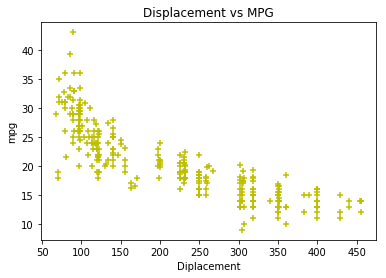

In [3]:
df = pd.read_csv('auto_train.csv')
pd.read_csv(io.StringIO(u""+df.to_csv(index=False)), header=None, skiprows=1)
y = df.drop(['horsepower','displacement'],axis=1)
x = df.drop(['horsepower','mpg'],axis=1)
#plt.plot(df.displacement,df.mpg,'y+')
plt.scatter(df.displacement,df.mpg,c='y',marker='+')
plt.title('Displacement vs MPG')
plt.xlabel('Diplacement')
plt.ylabel('mpg')
plt.show()

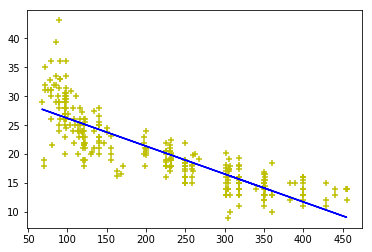

In [4]:
lm = LinearRegression()
lm.fit(x,y)
c = lm.intercept_
m = lm.coef_
plt.scatter(df.displacement,df.mpg,c='y',marker='+')
plt.plot(x, m*x+c, 'b')    #This is plotting the learned line.

In [5]:
y_pred = lm.predict(x)
y = np.array(y)
#Training error
print error(y_pred,y)

[ 1557.33098999]


In [6]:
# delete this cell
df_test = pd.read_csv('auto_test.csv')
#pd.read_csv(io.StringIO(u""+df_test.to_csv(index=False)), header=None, skiprows=1)
test = df_test.drop(['horsepower'],axis=1)
x_test = df_test.drop(['horsepower','mpg'],axis=1)
y_test = df_test.mpg

In [7]:
y_pred = lm.predict(x_test)
yy_test = [df_test.mpg[i] for i in range(0,len(df_test))]

[ 3565.75515444]


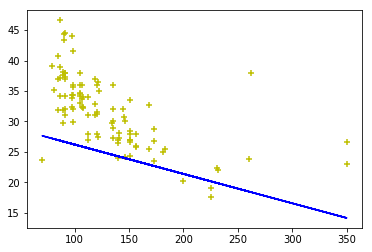

In [8]:
plt.scatter(df_test.displacement,df_test.mpg,c='y',marker='+')
plt.plot(x_test,y_pred,'b')
#Testing error
print error(y_test,y_pred)

In [9]:
# using squared values.
lm = LinearRegression()
df = df.sort_values(by=['displacement'])
train = df.drop(['horsepower'],axis=1)
x_ = train.drop(['mpg'],axis=1)
y = train.mpg
poly = PolynomialFeatures(degree=2)
x_sq = poly.fit_transform(x_)

In [10]:
lm.fit(x_sq,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred = lm.predict(x_sq)
y = np.array(y)
#Training error for degree 2
print error(y_pred,y)
df_test = df_test.sort_values(by=['displacement'])
test = df_test.drop(['horsepower'],axis=1)
y_test = df_test.drop(['horsepower','displacement'],axis=1)
y_test = np.array(y_test)
x_test = df_test.drop(['horsepower','mpg'],axis=1)
x_test = poly.fit_transform(x_test)
y_pred = lm.predict(x_test)
#Testing Error for degree 2
print error(y_pred,y_test)

1296.01058799
[ 3282.09475116]


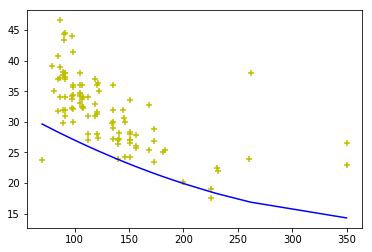

In [12]:
plt.scatter(test.displacement,test.mpg,c='y',marker='+')
plt.plot(test.displacement,y_pred,'b')

In [13]:
poly = PolynomialFeatures(degree=4)
x_four = poly.fit_transform(x_)
lm.fit(x_four,y)
y_pred = lm.predict(x_four)
print error(y_pred,y)
y_test = df_test.drop(['horsepower','displacement'],axis=1)
y_test = np.array(y_test)
x_test = df_test.drop(['horsepower','mpg'],axis=1)
x_test = poly.fit_transform(x_test)
y_pred = lm.predict(x_test)
print error(y_pred,y_test)

1242.23889296
[ 3411.64018156]


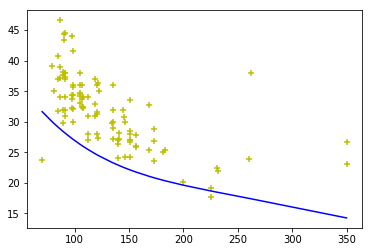

In [14]:
plt.scatter(test.displacement,test.mpg,c='y',marker='+')
plt.plot(test.displacement,y_pred,'b')

In [15]:
poly = PolynomialFeatures(degree=6)
x_six = poly.fit_transform(x_)
lm.fit(x_six,y)
y_pred = lm.predict(x_six)
print error(y_pred,y)
y_test = df_test.drop(['horsepower','displacement'],axis=1)
y_test = np.array(y_test)
x_test = df_test.drop(['horsepower','mpg'],axis=1)
x_test = poly.fit_transform(x_test)
y_pred = lm.predict(x_test)
print error(y_pred,y_test)

1219.7190268
[ 3445.10388439]


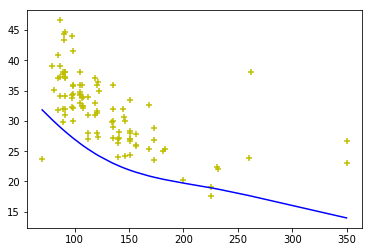

In [16]:
plt.scatter(test.displacement,test.mpg,c='y',marker='+')
plt.plot(test.displacement,y_pred,'b')

In [17]:
lm = LinearRegression()
x = df.drop(['mpg'],axis=1)
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print lm.coef_,lm.intercept_

[-0.03774276 -0.03144092] 32.3020596642


In [19]:
x_test = df_test.drop(['mpg'],axis=1)
y_test = df_test.drop(['displacement','horsepower'],axis=1)
y_test = np.array(y_test)
y_pred = lm.predict(x_test)
print error(y_pred,y_test)

[ 3443.39350363]


<h1>K nearest neighbours Implementation</h1>

In [20]:
import csv

In [21]:
def loadDataset(filename):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        dataset = dataset[1:]    # remove header
        for x in range(len(dataset)):
            for y in range(3):
                dataset[x][y] = float(dataset[x][y])
    return dataset

In [22]:
dataset = loadDataset('auto_train.csv')

In [23]:
import math
def euclideanDistance(vector1, vector2,length):
    distance = 0
    for x in range(length):
        distance += pow(vector1[x] - vector2[x],2)
    return math.sqrt(distance)

In [24]:
import operator
def getNeighbors(trainingSet,instance,k):
    distances = []
    for vector in trainingSet:
        #print vector
        dist = euclideanDistance(vector,instance,len(instance))
        #print dist
        distances.append((vector,dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [25]:
def getResponse(neighbors):
    result = 0
    _sum = 0
    for neighbor in neighbors:
        _sum += neighbor[len(neighbor)-1]
    result = _sum/len(neighbors)
    return result

In [26]:
getResponse(getNeighbors(dataset,[350.0, 165.0],3))

14.0

In [27]:
testset = loadDataset('auto_test.csv')

In [28]:
answers = [val[2] for val in testset]

In [29]:
def getPredictions(testset,dataset,k):
    predictions = []
    for vector in testset:
        vector = [vector[0],vector[1]]
        predictions.append(getResponse(getNeighbors(dataset,vector,k)))
    return predictions

predictions = getPredictions(testset,dataset,1)

print error(answers,predictions)

2868.005


In [30]:
predictions = getPredictions(testset,dataset,3)

print error(answers,predictions)

2794.73


In [31]:
predictions = getPredictions(testset,dataset,20)

print error(answers,predictions)

2746.1914125


<h1>Variation KNN - using just manhattan distance and normal average</h1>

In [32]:
def manhattanDistance(vector1,vector2,length):
    distance = 0
    for x in range(length):
        distance += abs(vector1[x] - vector2[x])
    return distance

In [33]:
def getManhattanNeighbors(trainingSet,instance,k):
    distances = []
    for vector in trainingSet:
        #print vector
        dist = manhattanDistance(vector,instance,len(instance))
        #print dist
        distances.append((vector,dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [34]:
def getManhattanPredictions(testset,dataset,k):
    predictions = []
    for vector in testset:
        vector = [vector[0],vector[1]]
        predictions.append(getResponse(getManhattanNeighbors(dataset,vector,k)))
    return predictions

predictions = getManhattanPredictions(testset,dataset,1)

print error(answers,predictions)

2838.83


In [35]:
predictions = getManhattanPredictions(testset,dataset,3)

print error(answers,predictions)

2676.45277778


In [36]:
predictions = getManhattanPredictions(testset,dataset,20)

print error(answers,predictions)

2800.3250375
